### Install and import libraries

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 4.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 92.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 151.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 107.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 154.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 126.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 153.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 92.9 MB/s eta 0:00:00
   ━

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.applications import MobileNet
import warnings
warnings.filterwarnings("ignore")

2024-06-18 14:36:36.080597: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Download the dataset from kaggle

Silakan ikuti langkah-langkah di bawah ini untuk mengunduh dan menggunakan data kaggle dalam Google Colab:

1. Buka akun Anda, Gulir ke bagian API dan Klik Expire API Token untuk menghapus token sebelumnya

2. Klik pada Buat Token API Baru - Ini akan mengunduh file kaggle.json di mesin Anda.

3. Buka file proyek Google Colab Anda dan jalankan perintah berikut:

In [3]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload() #upload file kaggle.json yang sudah diunduh

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list #mengecek apakah sudah terhubung

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           23MB  2024-06-18 13:27:55            194        382  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           8365        149  1.0              
damirdizdarevic/uefa-euro-2024-players                               UEFA EURO 2024 - Players                          15KB  2024-06-08 18:07:29           1779         39  1.0              
alistairking/nuclear-energy-datasets              

In [7]:
!kaggle datasets download -d crowww/a-large-scale-fish-dataset

Dataset URL: https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100%|██████████████████████████████████████▊| 3.23G/3.24G [00:33<00:00, 100MB/s]
100%|███████████████████████████████████████| 3.24G/3.24G [00:33<00:00, 103MB/s]


In [8]:
! mkdir fish-dataset
! unzip a-large-scale-fish-dataset.zip -d fish-dataset

Archive:  a-large-scale-fish-dataset.zip
  inflating: fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00001.png  
  inflating: fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00002.png  
  inflating: fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00003.png  
  inflating: fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00004.png  
  inflating: fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00005.png  
  inflating: fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00006.png  
  inflating: fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00007.png  
  inflating: fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00008.png  
  inflating: fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00009.png  
  inflating: fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/

### Prepare the data

In [11]:
dir = '/conten/fish-dataset/Fish_Dataset/Fish_Dataset' #direktori utama
classes = [i for i in os.listdir(dir) if '.' not in i]  #membuat folder untuk setiap kelas
classes

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [15]:
'''We will exclude the GT images from our directory as they are not needed for the analysis'''

# Initialize lists to hold file paths (excluding GT) and their corresponding labels
labels = []
paths = []

for root_dir, _, files in os.walk(dir):
    for file in files:
        if file.endswith('.png'):                             # Check if the file is a PNG
            if 'GT' not in root_dir.split()[-1]:             # Ensure the directory name does not contain 'GT'
                labels.append(os.path.basename(root_dir))    # Add the directory name to the labels list
                paths.append(os.path.join(root_dir, file))   # Add the full file path to the paths list

# Create the dataframe with columns for paths and labels
df = pd.DataFrame({'path': paths, 'label': labels})


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [17]:
df.head()


path            label
0  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...  Black Sea Sprat
1  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...  Black Sea Sprat
2  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...  Black Sea Sprat
3  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...  Black Sea Sprat
4  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...  Black Sea Sprat

In [18]:
df.path[0]


'/capstone/fish-dataset/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png'

In [19]:
df['label'].value_counts()

label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

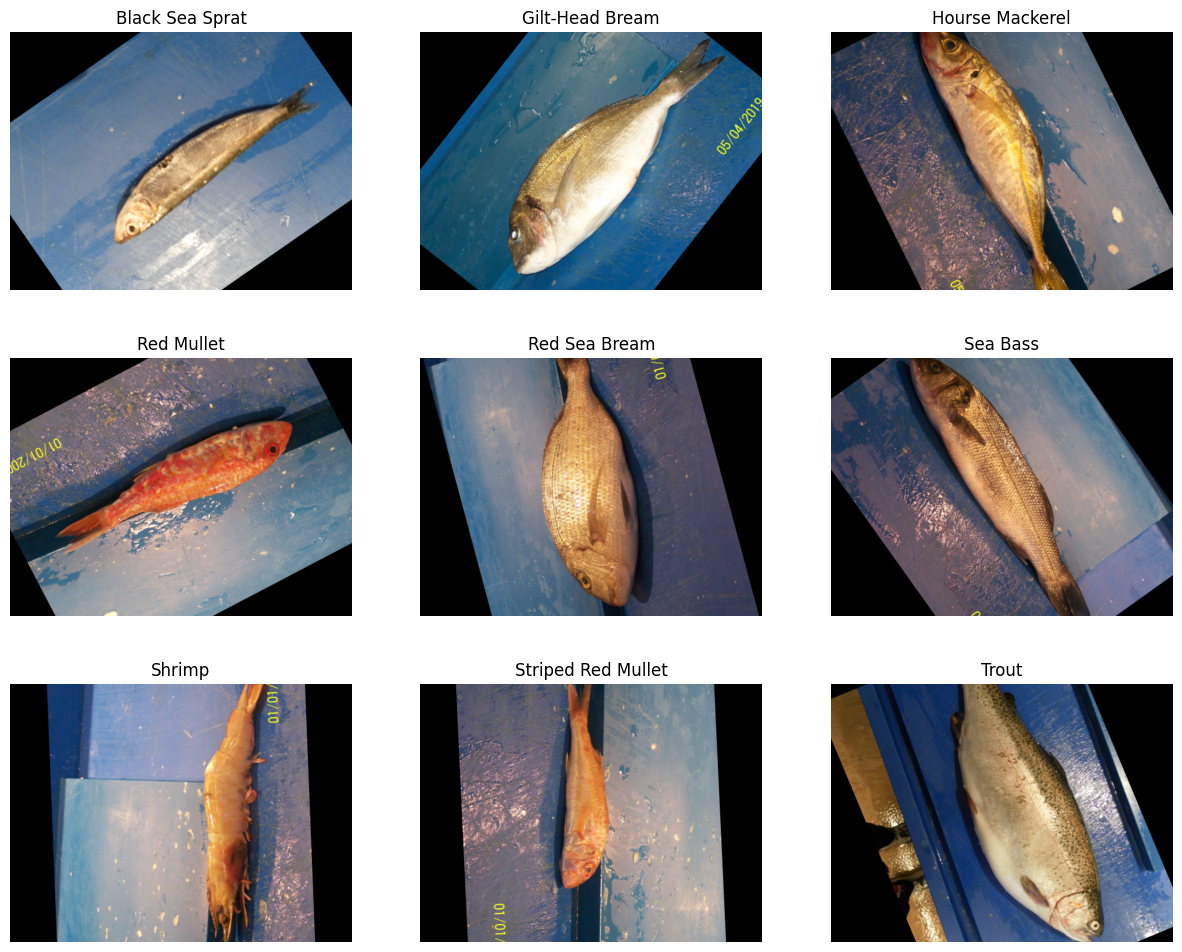

In [20]:
index = 0
plt.figure(figsize=(15, 12))

for label in df['label'].unique():
    plt.subplot(3, 3, index + 1)
    image_path = df[df['label'] == label].iloc[0, 0]
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    index += 1


### Split the data

In [21]:
# Splitting the data into training and testing sets with shuffling
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

# Displaying the shape of the resulting datasets
print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")

Training set shape: (7200, 2)
Testing set shape: (1800, 2)


### Preprocessing

In [22]:
# Using Keras ImageDataGenerator to preprocess images for the selected model
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_images = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [23]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


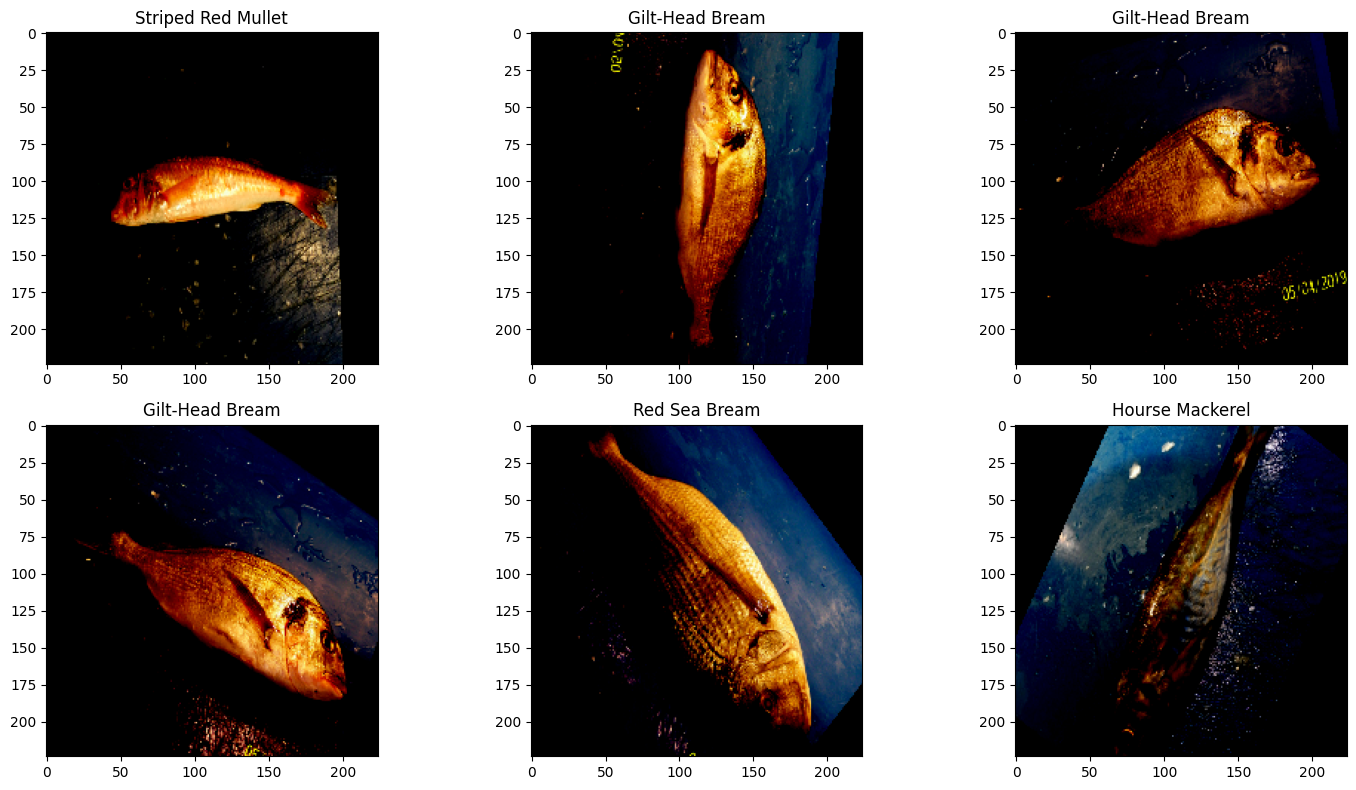

In [24]:
# Creating a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

# Displaying images and their labels in the subplots
for i in range(6):
    img_batch, label_batch = next(test_images)
    axes[i].imshow(img_batch[0])
    class_index = np.argmax(label_batch[0])
    class_name = list(test_images.class_indices.keys())[class_index]
    axes[i].set_title(class_name)
    axes[i].axis('on')

plt.tight_layout()
plt.show()

### Import the pretrained model

In [25]:
# Importing the pre-trained MobileNet model
pretrained_model = tf.keras.applications.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
# Freezing the pre-trained model layers
pretrained_model.trainable = False

2024-06-18 14:44:33.065524: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22280 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:a1:00.0, compute capability: 8.9


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Training and Testing

In [28]:
# Defining the input for the model
inputs = pretrained_model.input

# Adding custom layers on top of the pretrained model
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dropout(0.5)(x)  # Tambahkan dropout di sini
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)  # Tambahkan dropout lagi jika perlu
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

# Creating the complete model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Displaying the model summary
model.summary()

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=5)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,377,737 (12.89 MB)

 Trainable params: 148,873 (581.54 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 58s 279ms/step - accuracy: 0.4080 - loss: 1.7436 - val_accuracy: 0.9722 - val_loss: 0.1748
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 50s 272ms/step - accuracy: 0.8564 - loss: 0.4384 - val_accuracy: 0.9958 - val_loss: 0.0360
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 50s 270ms/step - accuracy: 0.9235 - loss: 0.2279 - val_accuracy: 0.9979 - val_loss: 0.0153
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 50s 268ms/step - accuracy: 0.9485 - loss: 0.1615 - val_accuracy: 0.9958 - val_loss: 0.0169
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 50s 269ms/step - accuracy: 0.9539 - loss: 0.1343 - val_accuracy: 0.9993 - val_loss: 0.0066


In [29]:
# Evaluating the model on the test dataset
results = model.evaluate(test_images, verbose=0)

# Printing the test loss and accuracy
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.00790
Test Accuracy: 99.78%


In [30]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 250ms/step


In [31]:
# Copying the test dataframe to create a prediction dataframe
pred_df = test_df.copy()

# Creating a dictionary to map class indices to labels
labels = {v: l for l, v in test_images.class_indices.items()}

# Assuming 'pred' contains the predicted class indices for the test images
pred_df['pred'] = pred

# Converting predicted class indices to labels
pred_df['pred'] = pred_df['pred'].apply(lambda x: labels[x])

# Resetting the index of the prediction dataframe and displaying the first 10 rows
pred_df = pred_df.reset_index(drop=True)
pred_df.head(10)

path               label  \
0  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...  Striped Red Mullet   
1  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...     Gilt-Head Bream   
2  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...     Black Sea Sprat   
3  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...       Red Sea Bream   
4  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...               Trout   
5  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...               Trout   
6  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...            Sea Bass   
7  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...               Trout   
8  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...          Red Mullet   
9  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...       Red Sea Bream   

                 pred  
0  Striped Red Mullet  
1     Gilt-Head Bream  
2     Black Sea Sprat  
3       Red Sea Bream  
4               Trout  
5               Trout  
6            Sea Bass  
7               Trout  
8          Red Mullet  
9       Red Sea Bream

In [32]:
# Generate predictions
pred_indices = np.argmax(model.predict(test_images), axis=-1)
pred = pred_indices

57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 219ms/step


In [33]:
# Incorrect prediction
pred_df[pred_df['label']!=pred_df['pred']]

path               label  \
510   /capstone/fish-dataset/Fish_Dataset/Fish_Datas...          Red Mullet   
553   /capstone/fish-dataset/Fish_Dataset/Fish_Datas...     Black Sea Sprat   
1443  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...  Striped Red Mullet   
1479  /capstone/fish-dataset/Fish_Dataset/Fish_Datas...  Striped Red Mullet   

                    pred  
510   Striped Red Mullet  
553      Hourse Mackerel  
1443     Hourse Mackerel  
1479            Sea Bass

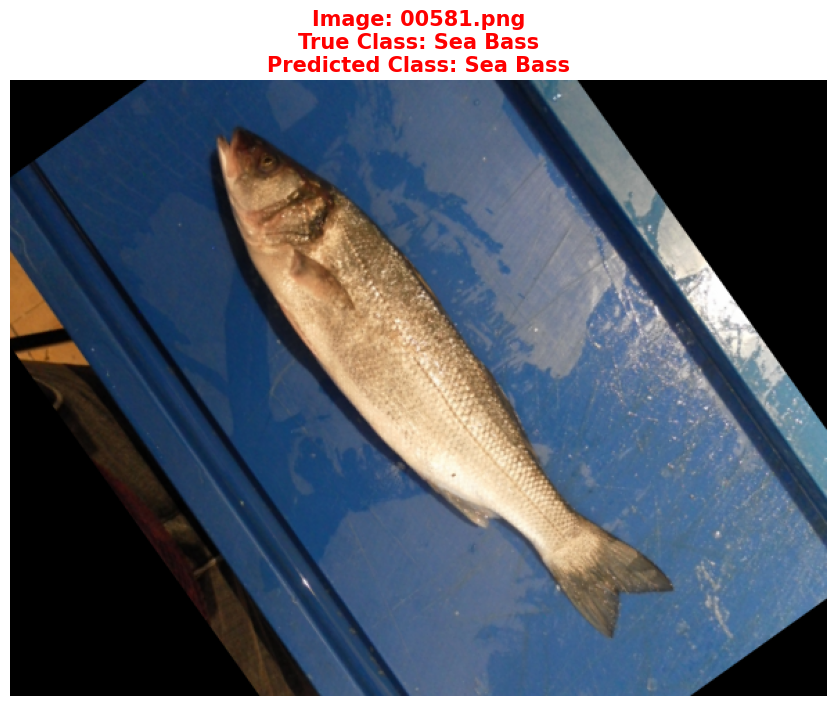

In [34]:
# Displaying the image along with its true and predicted classes
plt.figure(figsize=(15, 8))

# Loading and showing the image
image_path = pred_df.path[1604]
image = plt.imread(image_path)
plt.imshow(image)

# Extracting parts of the image path for the title
title1 = image_path.split('/')[-2]  # Directory name (true class)
title2 = image_path.split('/')[-1]  # File name
title3 = pred_df.pred[1604]         # Predicted class

# Setting the title with true and predicted classes
plt.title(f'Image: {title2}\nTrue Class: {title1}\nPredicted Class: {title3}', color='red', weight='bold', fontsize=15)
plt.axis('off')  # Turn off axis

plt.show()

### Confusion Matrix

Accuracy Score: 0.9977777777777778


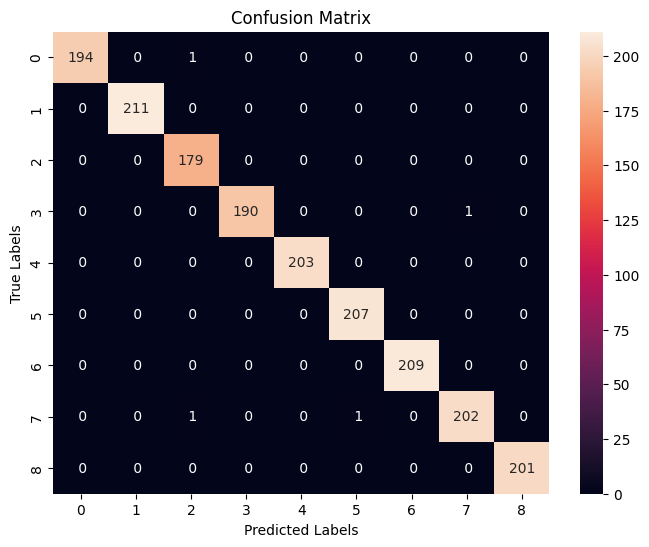

In [35]:
# Calculating and printing the accuracy score
accuracy = accuracy_score(pred_df['label'], pred_df['pred'])
print(f"Accuracy Score: {accuracy}")

# Creating a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(pred_df['label'], pred_df['pred']), annot=True, fmt='2d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [36]:
#Generating the Classification Report for in-depth analysis
print(classification_report(pred_df['label'],pred_df['pred']))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      0.99      1.00       195
   Gilt-Head Bream       1.00      1.00      1.00       211
   Hourse Mackerel       0.99      1.00      0.99       179
        Red Mullet       1.00      0.99      1.00       191
     Red Sea Bream       1.00      1.00      1.00       203
          Sea Bass       1.00      1.00      1.00       207
            Shrimp       1.00      1.00      1.00       209
Striped Red Mullet       1.00      0.99      0.99       204
             Trout       1.00      1.00      1.00       201

          accuracy                           1.00      1800
         macro avg       1.00      1.00      1.00      1800
      weighted avg       1.00      1.00      1.00      1800



### save the model for TFlite

In [ ]:
FISH_CLASSIFICATION_MOBILENET = "exp_saved_model"

In [ ]:
tf.saved_model.save(model, FISH_CLASSIFICATION_MOBILENET)

In [ ]:
%%bash -s $FISH_CLASSIFICATION_MOBILENET
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 224, 224, 3)
      name: serving_default_input_1:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_2'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 9)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


2024-06-13 11:17:24.447887: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 11:17:24.447958: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 11:17:24.560317: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-13 11:17:27.280505: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
loaded = tf.saved_model.load(FISH_CLASSIFICATION_MOBILENET)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'input_1': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1')})
{'dense_2': TensorSpec(shape=(None, 9), dtype=tf.float32, name='dense_2')}


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(FISH_CLASSIFICATION_MOBILENET)

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [ ]:
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

In [ ]:
tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
# Load TFLite model and allocate tensors.

interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
# Menyiapkan data input (sesuaikan dengan kebutuhan model Anda)
# Misalnya, untuk model yang menerima gambar 224x224 RGB
input_shape = input_details[0][224,224]
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)

# Menetapkan nilai input pada interpreter
interpreter.set_tensor(input_details[0]['index'], input_data)

# Menjalankan inferensi
interpreter.invoke()

# Mendapatkan hasil prediksi
output_data = interpreter.get_tensor(output_details[0]['index'])

print("Hasil Prediksi:", output_data)


NameError: name 'input_details' is not defined

### Save the model in .h5

In [37]:
model.save('model_fish.h5')

# unduh model
#from google.colab import files
#files.download('model_fish.h5')

### Predict a picture

In [38]:
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load model
model = load_model('/content/model_fish.h5')

# Meminta pengguna mengunggah gambar
uploaded = files.upload()

# Membaca dan memproses gambar yang diunggah
for file_name in uploaded.keys():
    img = Image.open(file_name).convert('RGB')  # Convert to RGB
    img = img.resize((224, 224))  # Ubah ukuran gambar sesuai dengan input model, misalnya 224x224
    img_array = np.array(img)

    # Menampilkan gambar yang diunggah
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()

    # Preprocessing gambar
    img_array = img_array / 255.0  # Normalisasi jika diperlukan
    img_array = img_array.reshape(1, 224, 224, 3)  # Ubah bentuk array sesuai dengan input model

    # Melakukan prediksi
    prediksi = model.predict(img_array)
    hasil_prediksi = ["Black Sea Sprat", "Gilt-Head Bream", "Hourse Mackerel", "Red Mullet", "Red Sea Bream", "Sea Bass", "Shrimp", "Striped Red Mullet", "Trout"]
    # Menampilkan hasil prediksi
    print("Hasil prediksi:", hasil_prediksi[np.argmax(prediksi)])


ModuleNotFoundError: No module named 'google.colab'

### Predict pictures in a folder

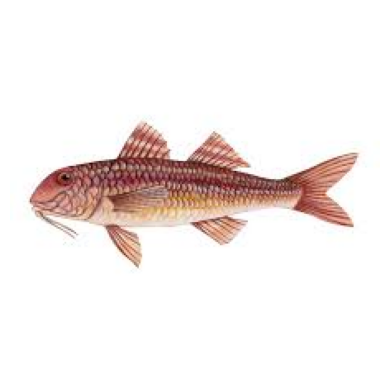

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


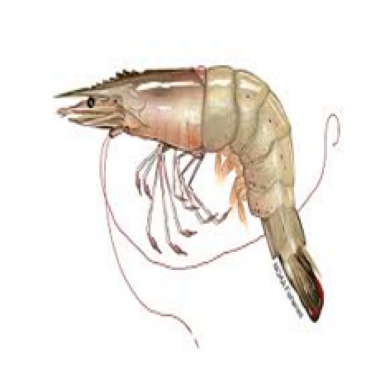

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


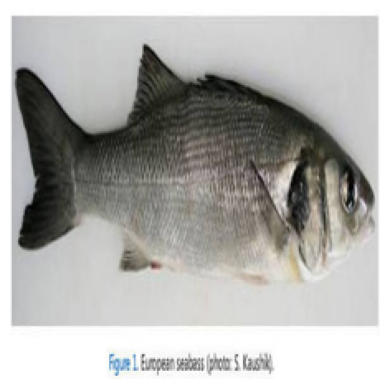

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


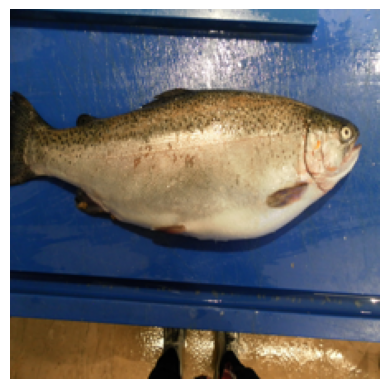

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


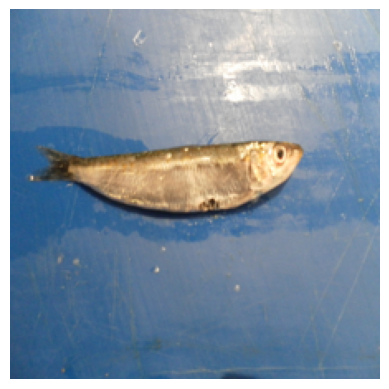

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


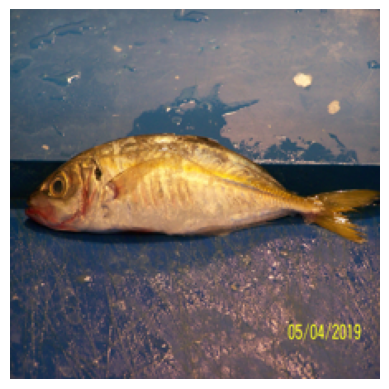

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


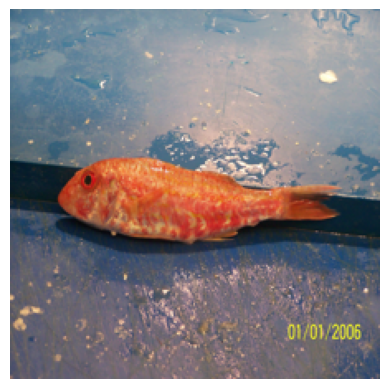

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


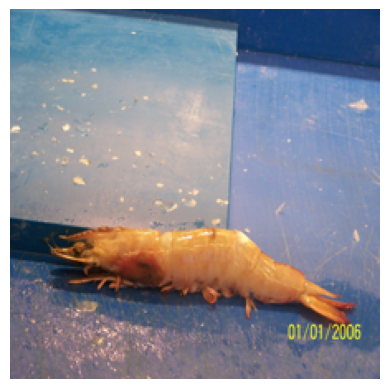

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


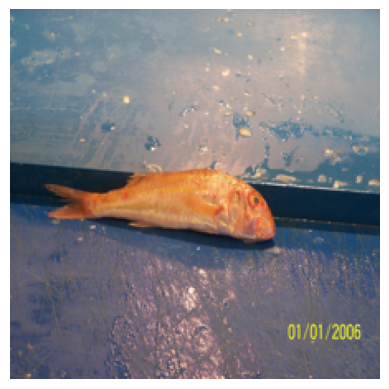

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
                        File Name       Prediction
0                  red mullet.jpg           Shrimp
1                      shrimp.jpg           Shrimp
2                 seabassFig1.jpg         Sea Bass
3               trout dataset.png            Trout
4     black sea sprat dataset.png  Black Sea Sprat
5      horse mackerel dataset.png   Horse Mackerel
6          red mullet dataset.png       Red Mullet
7              shrimp dataset.png           Shrimp
8  striped red mullet dataset.png           Shrimp


In [41]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load model
model = load_model('/content/model_fish.h5')

# Define the folder path containing the images
folder_path = '/content/gambar_ikan'  # Update this path to your folder

# Define the list of prediction labels
hasil_prediksi = ["Black Sea Sprat", "Gilt-Head Bream", "Horse Mackerel", "Red Mullet", "Red Sea Bream", "Sea Bass", "Shrimp", "Striped Red Mullet", "Trout"]

# Initialize lists to store file names and predictions
file_names = []
predictions = []

# Process and predict each image in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(('.png', '.jpg', '.jpeg')):  # Add more image extensions if needed
        file_path = os.path.join(folder_path, file_name)
        img = Image.open(file_path).convert('RGB')  # Convert to RGB
        img = img.resize((224, 224))  # Resize image to the input size expected by the model
        img_array = np.array(img)

        # Display the image (optional)
        plt.imshow(img_array)
        plt.axis('off')
        plt.show()

        # Preprocess the image
        img_array = img_array / 255.0  # Normalize if needed
        img_array = img_array.reshape(1, 224, 224, 3)  # Reshape the array to match the input shape of the model

        # Predict the class
        prediksi = model.predict(img_array)
        pred_class = hasil_prediksi[np.argmax(prediksi)]

        # Append the file name and prediction to the lists
        file_names.append(file_name)
        predictions.append(pred_class)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'File Name': file_names,
    'Prediction': predictions
})

# Display the results table
print(results_df)

# Save the results to a CSV file if needed
results_df.to_csv('prediction_results.csv', index=False)
